In [ ]:
 !pip install scikit-learn-extra
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os

In [ ]:
df = pd.read_csv('data_ecu.txt', sep='\t')

In [ ]:
df.shape

(305, 2)

In [ ]:
df.head()

,Longitude,Latitude
0,-80.43876447751417,"-0,9519244059855368"
1,-80.42499386576185,"-0,7890541493993685"
2,-78.4154028108096,"-0,0191854793665598"
3,-79.91790871558031,"-2,1991032880049435"
4,-80.48995382890078,"-0,496245130223165"


In [ ]:
df.dtypes

,0
Longitude,object
Latitude,object


In [ ]:
df.isnull().sum()

,0
Longitude,15
Latitude,0


In [ ]:
df.duplicated().sum()

7

In [ ]:
def porcentaje_nulos_por_fila(df):
    porcentaje_nulos = df.isnull().mean(axis=1) * 100
    return porcentaje_nulos

In [ ]:
df.describe()

,Longitude,Latitude
count,290,305
unique,288,298
top,error,"999,0"
freq,3,3


In [ ]:

porcentaje_nulos = porcentaje_nulos_por_fila(df)
porcentaje_nulos

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
300,50.0
301,50.0
302,50.0
303,50.0


In [ ]:
df.describe()

,Longitude,Latitude
count,290,305
unique,288,298
top,error,"999,0"
freq,3,3


In [ ]:
df['Latitude'] = df['Latitude'].str.replace(',', '.')


In [ ]:
# Reemplazar valores 999 por NaN antes de la conversión
df['Latitude'].replace(999, np.nan, inplace=True)

# Convertir a numérico nuevamente (aunque este paso ya lo hiciste)
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# Revisar nuevamente el DataFrame después de la corrección
df.describe()


<ipython-input-85-2061a5c22300>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].replace(999, np.nan, inplace=True)


,Longitude,Latitude
count,287.000000,302.000000
mean,-79.580055,-1.075067
std,0.812045,0.877010
min,-80.513432,-2.252734
25%,-80.349750,-2.137721
50%,-79.899226,-0.972678
75%,-78.547146,-0.162755
max,-78.377504,0.058433


In [ ]:
df.shape

(305, 2)

In [ ]:
df.isnull().sum()

,0
Longitude,18
Latitude,3


In [ ]:
df['Longitude']


,Longitude
0,-80.438764
1,-80.424994
2,-78.415403
3,-79.917909
4,-80.489954
...,...
300,NaN
301,NaN
302,NaN
303,NaN


In [ ]:
df['Latitude'].isnull().sum()

3

In [ ]:
# Contar el número de valores NaN en la columna 'Longitude'
nan= df['Longitude'].isna().sum()

# Contar el total de filas en el dataset
total= len(df)

# Calcular el porcentaje de NaN
porcentaje = (nan/ total) * 100
porcentaje

5.901639344262295

In [ ]:
df_cleaned = df.dropna(subset=['Longitude', 'Latitude'])


In [ ]:
df_cleaned.shape

(287, 2)

In [ ]:
df_cleaned.describe()

,Longitude,Latitude
count,287.000000,287.000000
mean,-79.580055,-1.081214
std,0.812045,0.890747
min,-80.513432,-2.252734
25%,-80.349750,-2.147783
50%,-79.899226,-0.954931
75%,-78.547146,-0.162449
max,-78.377504,0.058433


Kmeans

In [ ]:
# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_cleaned)
labels = kmeans.labels_

In [ ]:
# Agregar los clusters al DataFrame
df_cleaned['Cluster'] = labels

<ipython-input-95-2c10d7140d1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = labels


In [ ]:
df_cleaned

,Longitude,Latitude,Cluster
0,-80.438764,-0.951924,2
1,-80.424994,-0.789054,2
2,-78.415403,-0.019185,1
3,-79.917909,-2.199103,0
4,-80.489954,-0.496245,2
...,...,...,...
295,-78.403860,-0.162934,1
296,-79.929616,-2.097304,0
297,-78.451146,-0.115914,1
298,-80.367060,-0.518622,2


In [ ]:
# Guardar los resultados en el archivo "clusters.txt" en el directorio actual
cluster = 'clusters.txt'
with open(cluster, 'w') as f:
    for index, label in enumerate(labels):
        f.write(f"{index} {label}\n")



In [ ]:
from google.colab import files

# Descargar el archivo a tu computadora
files.download('clusters.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Ver todas las etiquetas de clusters
df_cleaned[['Longitude', 'Latitude', 'Cluster']]

,Longitude,Latitude,Cluster
0,-80.438764,-0.951924,2
1,-80.424994,-0.789054,2
2,-78.415403,-0.019185,1
3,-79.917909,-2.199103,0
4,-80.489954,-0.496245,2
...,...,...,...
295,-78.403860,-0.162934,1
296,-79.929616,-2.097304,0
297,-78.451146,-0.115914,1
298,-80.367060,-0.518622,2


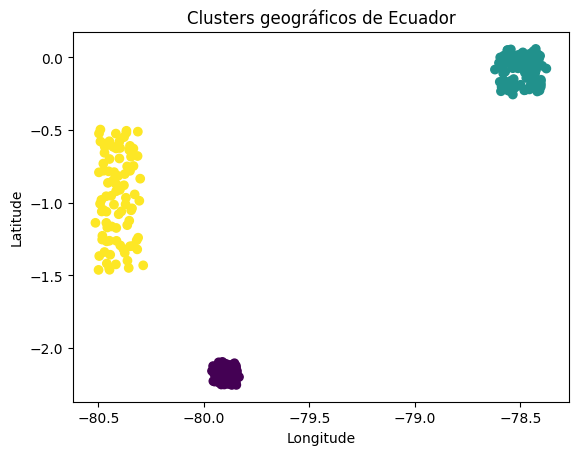

In [ ]:
import matplotlib.pyplot as plt

# Visualización rápida de los clusters
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], c=df_cleaned['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters geográficos de Ecuador')
plt.show()
